# Cours Programmation Dynamique
### Source     :
### Adaptation : Fabrice Mulotti
v1.0

In [69]:
import gym
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt

if "../" not in sys.path:
  sys.path.append("../") 

from lib.envs.windy_gridworld import WindyGridworldEnv

# Disable jedi autocompleter
%config Completer.use_jedi = False
# %matplotlib inline
# %matplotlib widget

### Déclaration env

In [96]:
env = gym.make('FrozenLake8x8-v1',is_slippery = False)
# env = gym.make('FrozenLake-v1',is_slippery=False)


In [97]:
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


### Quelques caractéristiques de notre env

In [98]:
env.observation_space.n

64

In [99]:
env.action_space.n

4

env.P[s] nous permet de déterminer en fonction de l'état s et de l'action a:
prob , s' , r , final ?

In [100]:
env.P[0]

{0: [(1.0, 0, 0.0, False)],
 1: [(1.0, 8, 0.0, False)],
 2: [(1.0, 1, 0.0, False)],
 3: [(1.0, 0, 0.0, False)]}

-> Exemple pour l'état 0 et l'action 0 et le premier état s' dans la liste

In [101]:
env.P[0][0][0]

(1.0, 0, 0.0, False)

![title](static/value_iteration.png)

In [111]:
# Recherche de v*
def value_iteration(env,theta,max_iter,gamma):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    deltaT = []

    fvalue=np.full(env.observation_space.n,0.0)
    for k in range(max_iter):
        save_fvalue=np.copy(fvalue)
        for s in range(env.observation_space.n):  
            max_Qa = -100
            for a in range(env.action_space.n):
                q=0
                for p,s_,r,done in env.P[s][a]:
                    q = q + p * (r + gamma * save_fvalue[s_])
                    # print("s=",s," a=",a," s_=",s_,"q = ",q,"[",p,r,"]")
                max_Qa=max(max_Qa,q)
                # print(max_Qa,q)
                # print(p,s,s_,a,r,max_Qa)

            fvalue[s] = max_Qa
        # print(fvalue.reshape(8,8))
        delta=np.sum(np.fabs(save_fvalue - fvalue))
        deltaT.append(delta)
        
        if int(k/100)==k/100:
            ax.plot(deltaT)
            fig.canvas.draw()

        if (delta <= theta):
            break
    return(k,fvalue)


### Tests à faire :
Slippery = True   
Slipperry = False, Gamma= 1   
Slippery = False, Gamma = 0.8 , 10 itérations en affichant la fv   
Slippery = False, Gamma = 0.8 , 1000

14  itérations


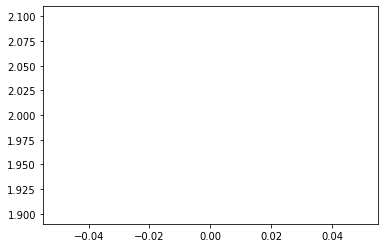

In [112]:
plt.ion()
k,fv=value_iteration(env=env,theta=1e-20,max_iter=1000,gamma=0.8)
print(k," itérations")

In [115]:
fv

array([0.05497558, 0.06871948, 0.08589935, 0.10737418, 0.13421773,
       0.16777216, 0.2097152 , 0.262144  , 0.06871948, 0.08589935,
       0.10737418, 0.13421773, 0.16777216, 0.2097152 , 0.262144  ,
       0.32768   , 0.08589935, 0.10737418, 0.13421773, 0.        ,
       0.2097152 , 0.262144  , 0.32768   , 0.4096    , 0.10737418,
       0.13421773, 0.16777216, 0.2097152 , 0.262144  , 0.        ,
       0.4096    , 0.512     , 0.08589935, 0.10737418, 0.13421773,
       0.        , 0.32768   , 0.4096    , 0.512     , 0.64      ,
       0.06871948, 0.        , 0.        , 0.32768   , 0.4096    ,
       0.512     , 0.        , 0.8       , 0.08589935, 0.        ,
       0.2097152 , 0.262144  , 0.        , 0.64      , 0.        ,
       1.        , 0.10737418, 0.13421773, 0.16777216, 0.        ,
       0.64      , 0.8       , 1.        , 0.        ])

In [116]:
# Détermination de la meilleur politique pi*
def best_policy(env,fvalue,gamma):
    policy=np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        Q = []
        for a in range(env.action_space.n):
            q=0
            for p,s_,r,done in env.P[s][a]:
                q = q + p * (r + gamma * fvalue[s_])
            Q.append(q)
        # print(Q,np.argmax(np.array(Q)))
        policy[s]=np.argmax(Q)
    return(policy)

In [117]:
policy=best_policy(env,fv,0.8)

In [13]:
np.save("iteration_valeur_best_policy",policy)

# Testons l'environnement

0: LEFT <br>
1: DOWN<br>
2: RIGHT<br>
3: UP<br>

In [121]:
curpos=env.reset()
env.render()
print(policy.reshape(8,8))
done=False
print("Start")
while done == False:
    back=env.step(int(policy[curpos]))
    # print("Curpos ",curpos,", Policy ",policy[curpos],back)
    curpos=back[0]
    done=back[2]
    # env.render()
    # time.sleep(1)
print("Done ",back)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 2. 1. 1.]
 [2. 2. 2. 2. 1. 0. 1. 1.]
 [2. 2. 3. 0. 1. 1. 2. 1.]
 [1. 0. 0. 2. 2. 1. 0. 1.]
 [1. 0. 2. 3. 0. 1. 0. 1.]
 [2. 2. 3. 0. 2. 2. 2. 0.]]
Start
Done  (63, 1.0, True, {'prob': 1.0})
